# CA Data Science Takehome Problem

### For this problem, you are provided a data set recording various details about US domestic flights. Please explore the data however you prefer, and try to identify anything interesting, such as correlations, patterns, or strange outliers. When you are done, prepare a write-up or annotate your notebook to show what you discovered. Be prepared to present your findings to the team if invited to continue to an on-site interview.

### This is an open-ended problem, which we expect will take approximately three hours to complete. This starter notebook has loaded the airline data into a data frame for you to use, but feel free to use any additional libraries or outside data that you would like.

In [1]:
import pandas as pd
import numpy as np
import glob
import csv
import requests
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from collections import Counter

pd.set_option('display.max_columns', 500)

## Loading the CSVs

In [2]:
r = requests.get('http://ca-data-science-interview.s3.amazonaws.com')
xml = r.text

csvs = []
root = ET.fromstring(xml)
    
for content in root.findall('{http://s3.amazonaws.com/doc/2006-03-01/}Contents'):
    key = content.find('{http://s3.amazonaws.com/doc/2006-03-01/}Key').text
    csvs.append(key)
    
for csv in csvs:
    r = requests.get(f'http://ca-data-science-interview.s3.amazonaws.com/{csv}', stream = True)
    with open(csv, "wb") as f:
        for chunk in r.iter_content(chunk_size = 1024):
            if chunk:
                f.write(chunk)

    
df = pd.concat([pd.read_csv(csv, low_memory=False) for csv in csvs])
df = df.drop("Unnamed: 37", axis = 1) # All of the lines in the CSVs have an extra comma at the end that gets interpreted as an unnamed column.
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2015,3,8,8,6,2015-08-08,19690,HA,N491HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1738.0,-4.0,1829,1820.0,-9.0,0.0,NaN,0.0,47.0,42.0,27.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,9,7,2015-08-09,19690,HA,N493HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1741.0,-1.0,1829,1822.0,-7.0,0.0,NaN,0.0,47.0,41.0,28.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,10,1,2015-08-10,19690,HA,N491HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1733.0,-9.0,1829,1818.0,-11.0,0.0,NaN,0.0,47.0,45.0,26.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,11,2,2015-08-11,19690,HA,N485HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1735.0,-7.0,1829,1821.0,-8.0,0.0,NaN,0.0,47.0,46.0,27.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,12,3,2015-08-12,19690,HA,N485HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1738.0,-4.0,1829,1816.0,-13.0,0.0,NaN,0.0,47.0,38.0,26.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN


## Getting column descriptions

In [7]:
reader = csv.reader(open('701878033_T_ONTIME_ReadMe.csv', 'r'))
column_labels = {}
for row in reader:
    column_labels[row[0]] = row[1]
    
def describe_column(col_name):
    if col_name in column_labels.keys():
        return column_labels[col_name]
    else:
        return 'Unknown column'

## Some basic views of the data

<BarContainer object of 7 artists>

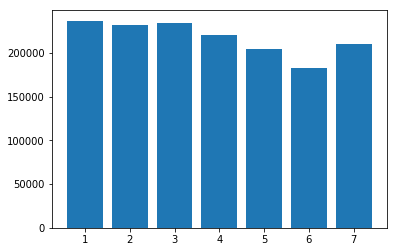

In [8]:
# Numbers of flights by day of the week

counts = Counter(list(df['DAY_OF_WEEK']))
plt.bar(counts.keys(), counts.values())

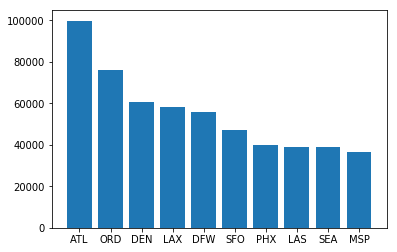

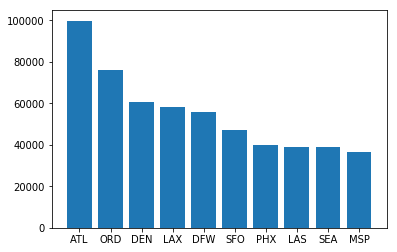

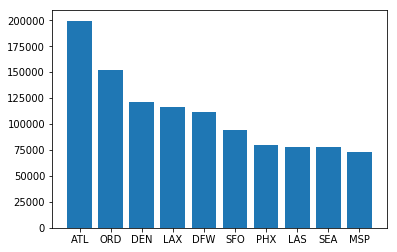

In [9]:
# Total number of flights by airport

def graph_counts(counts, num = 10):
    x = [a[0] for a in counts.most_common(num)]
    y = [a[1] for a in counts.most_common(num)]
    plt.bar(x, y)
    plt.show()

dest_counts = Counter(list(df['DEST']))
orig_counts = Counter(list(df['ORIGIN']))
total_counts = Counter()
total_counts.update(dest_counts)
total_counts.update(orig_counts)

graph_counts(dest_counts)
graph_counts(orig_counts)
graph_counts(total_counts)

In [ ]:
# ADD YOUR CODE HERE